# Exploratory Data Analysis

In [88]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spacy
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

from tqdm.notebook import tqdm
tqdm.pandas()

nlp = spacy.load('en_core_web_sm', disable = ['parser','ner'])

In [3]:
ds = load_dataset("banking77")

Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

Dataset banking77 downloaded and prepared to /root/.cache/huggingface/datasets/banking77/default/1.1.0/aec0289529599d4572d76ab00c8944cb84f88410ad0c9e7da26189d31f62a55b. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [73]:
X_train = pd.DataFrame(ds["train"]["text"], columns=["text"])
y_train = pd.DataFrame(ds["train"]["label"], columns=["label"])

X_test = pd.DataFrame(ds["test"]["text"], columns=["text"])
y_test = pd.DataFrame(ds["test"]["label"], columns=["label"])

X_train["type"] = "train"
X_test["type"] = "test"

X_train["sent_len"] = X_train['text'].apply(lambda x: len(x.split()))
X_test["sent_len"] = X_test['text'].apply(lambda x: len(x.split()))

X_train["char_count"] = X_train['text'].apply(len)
X_test["char_count"] = X_test['text'].apply(len)

X_train['polarity'] = X_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
X_test['polarity'] = X_test['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

concat_df = pd.concat([X_train, X_test])

In [74]:
print(set(ds['train']['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76}


<AxesSubplot:xlabel='label'>

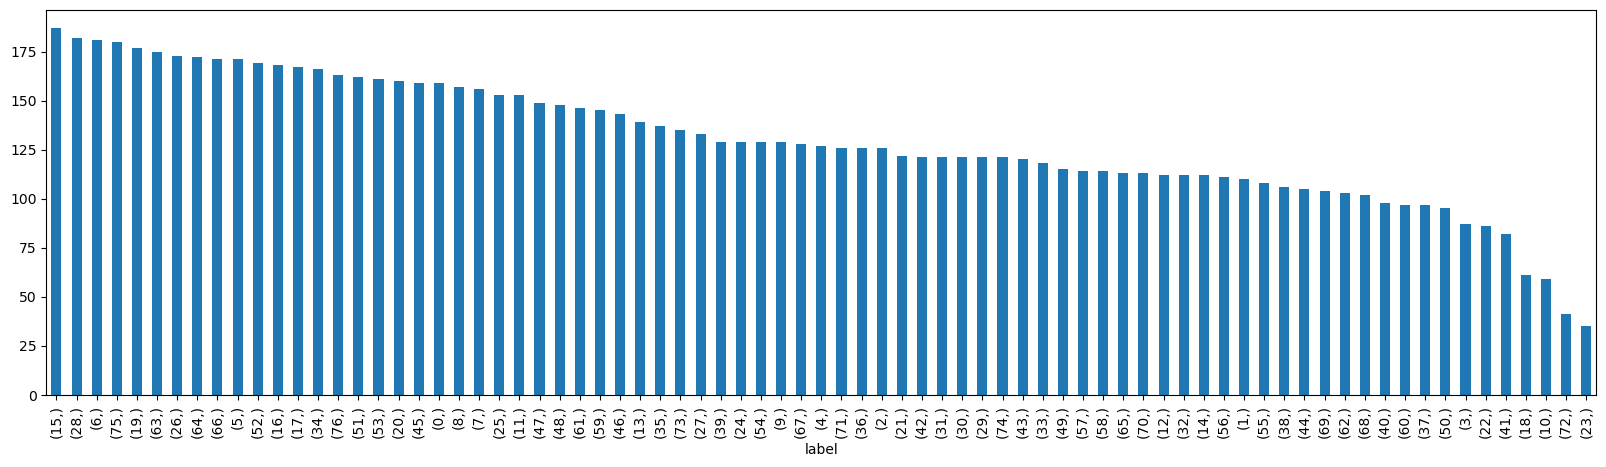

In [75]:
y_train.value_counts().plot.bar(figsize=(20,5))

Датасет довольно сбалансированный.

Text(0.5, 0.98, 'Распределение длин предложений (в токенах)')

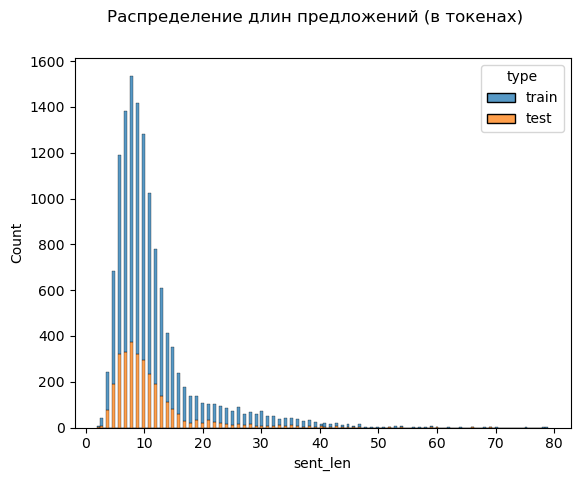

In [76]:
sns.histplot(x="sent_len", data=concat_df, hue="type", multiple="stack")
plt.suptitle("Распределение длин предложений (в токенах)")

Тексты в основном до 20 токенов.

Text(0.5, 0.98, 'Распределение длин предложений (в символах)')

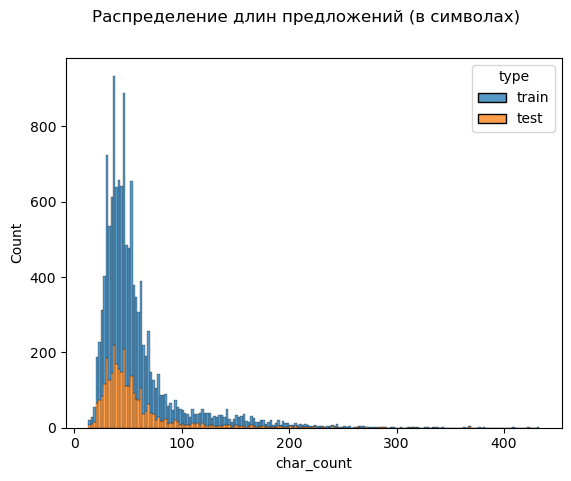

In [77]:
sns.histplot(x="char_count", data=concat_df, hue="type", multiple="stack")
plt.suptitle("Распределение длин предложений (в символах)")

Тексты короткие, в основном до 200 символов.

Text(0.5, 0.98, 'Полярность тектов')

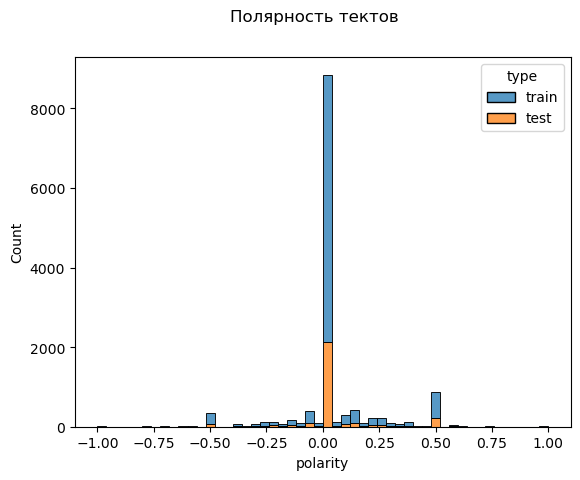

In [79]:
sns.histplot(x="polarity", data=concat_df, hue="type", multiple="stack", bins=50)
plt.suptitle("Полярность тектов")

Тексты в основном нейтральные.

### Word Cloud самых популярных слов

In [83]:
def lemmatization(text: str) -> str:
    return " ".join([
        token.lemma_.lower() for token in nlp(text) 
        if not token.is_stop and not token.is_digit and not token.is_punct
    ])

In [89]:
X_train['lemmas'] = X_train['text'].progress_apply(lambda x: lemmatization(x))

  0%|          | 0/10003 [00:00<?, ?it/s]

In [94]:
vectorizer = CountVectorizer(ngram_range=(1, 5))
vec_data = vectorizer.fit_transform(X_train['lemmas'])
sum_words = vec_data.sum(axis=0)
    
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wordcloud = WordCloud(background_color="white",
                      width=1600, height=800).generate_from_frequencies(dict(words_freq))

(-0.5, 1599.5, 799.5, -0.5)

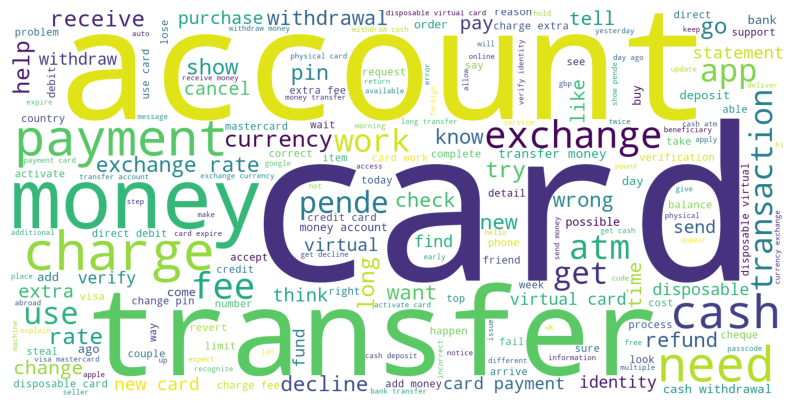

In [95]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis("off")